# PRiAD2 - test zaliczający

Test obejmuje zagadnienia, których dotyczy skrypt PRiAD2 ale wymaga także wiedzy z wcześniejszych ćwiczeń.

In [2]:
# przyda się
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

**Imię, nazwisko i numer indeksu:** Maciej Czarkowski, 292810

> **Zadanie 1** Wyświetl wykres liniowy średnich kursów **miesięcznych** walut pobranych z jednego z dwóch dostępnych plików

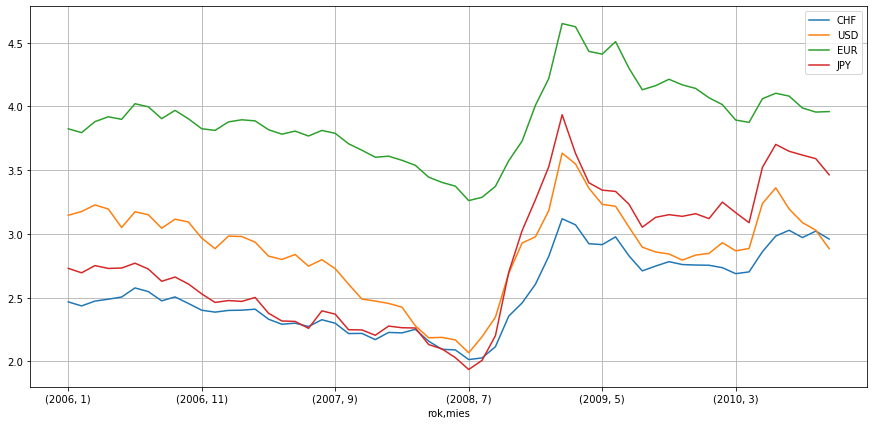

In [10]:
#plt.rcParams['figure.dpi'] = 100
gr = pd.read_excel('waluty1.xls')
gr = gr.groupby(['rok','mies']).mean()
gr = gr.drop(columns = 'dzien')
ax = gr.plot(figsize=(15,7), grid = 'true')

> **Zadanie 2** Wyswietl wykres kolumnowy przedstawiający średnie **roczne** kursy czterech walut pobranych z jednego z dwóch dostępnych plików

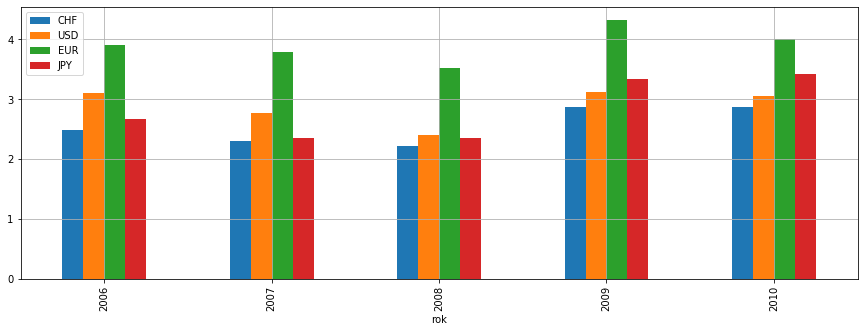

In [3]:
gr = pd.read_excel('waluty1.xls')
gr = gr.drop(columns = ['dzien','mies'])
gr = gr.groupby(['rok']).mean()
#gr['rok']= pd.to_datetime(df['rok'])
gr.plot.bar(figsize=(15,5), grid = 'true')

> **Zadanie 3** Wyświetl wykres słupkowy pokazujący liczbę ludności wszystkich dużych państw świata tj. liczących więcej niż 35 milionów mieszkańców w kolejności od najmniejszego do największego. 

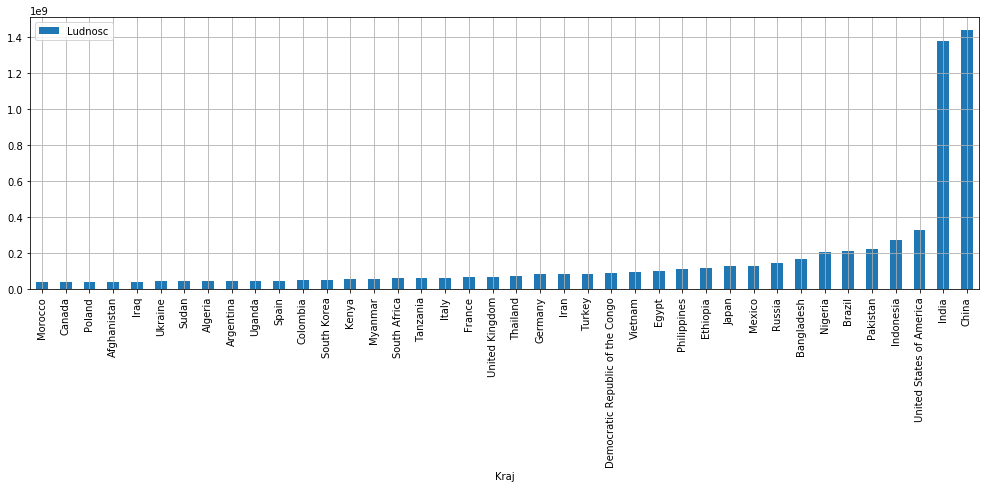

In [9]:
panstwa = pd.read_excel('alphabetical-list-of-countries2020.xlsx',header = 4,usecols = range(2,5), index_col = 0)
panstwa.columns = ['Ludnosc','Powierzchnia']
panstwa.index.name = 'Kraj'
#df = panstwa.loc[panstwa['Ludnosc'] > 35000000] (alternatywa)
df = panstwa[panstwa.Ludnosc > 35000000]
df = df.sort_values('Ludnosc')
df.plot.bar(figsize = (17,5), grid = 'true')

> **Zadanie 4** Wczytaj dowolny obraz, wyświetl histogramy poszczególnych jego składowych.

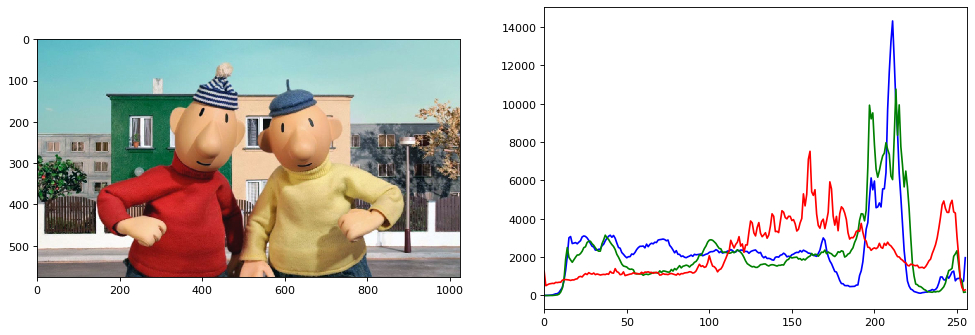

In [5]:
obraz = cv2.imread('sasiad.jpg')
color = ('b','g','r')
plt.figure(figsize=(15,5), dpi= 80)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(obraz,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
for i,col in enumerate(color):
    histr = cv2.calcHist([obraz],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

> **Zadanie 5** Narysuj histogramy poszczególnych atrybutów zbioru danych `iris` z podziałem na klasy, oraz macierz wykresów punktowych. Oceń przydatność poszczególnych atrybutów do rozróżniania odmian irysa

Text(0.5, 1.05, 'Macierz wykresów punktowych')

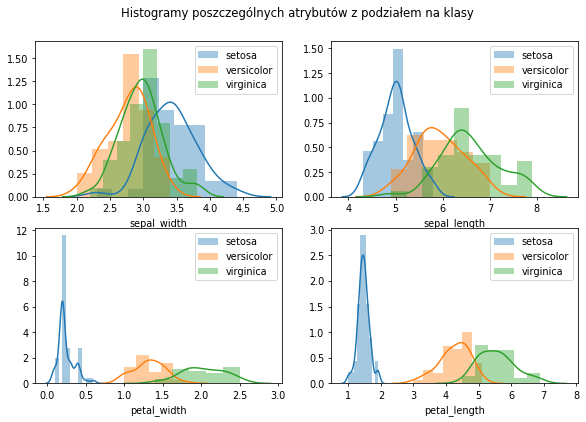

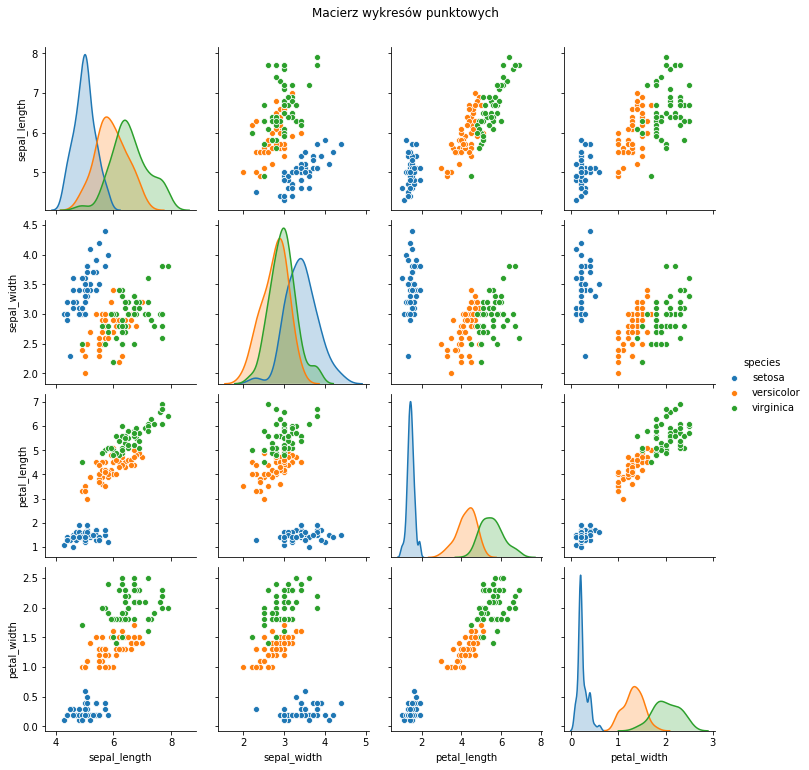

In [8]:
iris = pd.read_csv('iris.csv', usecols = range(1,6))
def pokaz_atrybut(atr):
    sns.distplot(iris.loc[iris.species == 'setosa', atr], label="setosa")
    sns.distplot(iris.loc[iris.species == 'versicolor',atr], label="versicolor")
    sns.distplot(iris.loc[iris.species == 'virginica',atr], label="virginica")
    plt.legend()
    
plt.figure(figsize=(10,10), dpi= 70)
plt.suptitle('Histogramy poszczególnych atrybutów z podziałem na klasy', y = 0.93)
plt.subplot(321)
atr = 'sepal_width'
pokaz_atrybut(atr)
plt.subplot(322)
atr = 'sepal_length'
pokaz_atrybut(atr)
plt.subplot(323)
atr = 'petal_width'
pokaz_atrybut(atr)
plt.subplot(324)
atr = 'petal_length'
pokaz_atrybut(atr)
g = sns.pairplot(iris, kind="scatter", hue = "species")
g.fig.suptitle('Macierz wykresów punktowych', y = 1.05)

**Wnioski:** (tu wpisz wnioski - ocena przydatności atrybutów)


> **Zadanie 6** Zmień nazwę tego skryptu na następującą "PRiAD2_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.